<a href="https://colab.research.google.com/github/Blantranderozari/Blantranderozari/blob/main/Chap02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 02: Essentials Statistics for Data Assesment

From the book *Essentials Statistics for Non-STEM Data Analyst*
(Rongpeng Li, Packt Books 2020).

Topics covered:

*   Classifying numerical and categorical variables
*   Understanding mean, median and mode
*   Learn about variance, standard deviation, percentiles and skewness
*   How to handle categorial variable and mixed data
*   Using bivariate and multivariate descriptive statistics

In [3]:
# Mount google drive
import os
from google.colab import drive
drive.mount("/content/drive/",force_remount=True)

Mounted at /content/drive/


## Classifying numerical and categorical variables

In [4]:
# Distinguishing betweeen Numerical and Categorial variables
#import xlrd
import pandas as pd
print("pandas version:", pd.__version__)

df = pd.read_excel("drive/MyDrive/Colab Notebooks/PopulationEstimates2013.xlsx",skiprows=2)

df.info()
df.describe()
df.head(8)

pandas version: 1.3.5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3273 entries, 0 to 3272
Columns: 149 entries, FIPS to R_NET_MIG_2018
dtypes: float64(135), int64(12), object(2)
memory usage: 3.7+ MB


,FIPS,State,Area_Name,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,...,R_DOMESTIC_MIG_2017,R_DOMESTIC_MIG_2018,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018
0,0,US,United States,NaN,NaN,NaN,NaN,NaN,308745538,308758105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,NaN,4779736,4780138,...,0.424031,1.171362,0.516888,1.234191,1.607294,0.619874,0.646064,0.817666,1.079070,1.856398
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,0.0,54571,54574,...,1.066088,0.666403,6.002073,-6.119262,-3.885124,1.971001,-1.859380,5.250727,1.029950,0.630381
3,1003,AL,Baldwin County,4.0,3.0,5.0,2.0,5.0,182265,182264,...,21.996950,24.298662,16.345147,17.638173,22.876199,20.239802,17.932091,21.484903,22.534622,24.846682
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,3.0,27457,27457,...,-25.501697,-9.072923,0.256035,-6.786002,-8.093425,-5.102231,-15.531931,-18.152860,-25.030896,-8.593297
5,1007,AL,Bibb County,1.0,1.0,1.0,1.0,0.0,22915,22920,...,-3.589550,-7.029251,-5.041759,-3.787629,-5.666224,1.065317,1.507660,-0.753246,-3.146396,-6.584362
6,1009,AL,Blount County,1.0,1.0,1.0,1.0,0.0,57322,57321,...,6.224858,-0.172910,0.243633,-1.633022,-0.295188,-1.980336,-1.286475,-1.025739,6.363573,-0.034582
7,1011,AL,Bullock County,6.0,6.0,6.0,6.0,3.0,10914,10911,...,-20.820159,-2.953628,-22.546973,-7.047547,-6.427829,9.521116,-24.590553,-3.079736,-21.014740,-3.150537


Text(0.5, 1.0, 'Rate of Net Immigration Distribution for all Records, 2013')

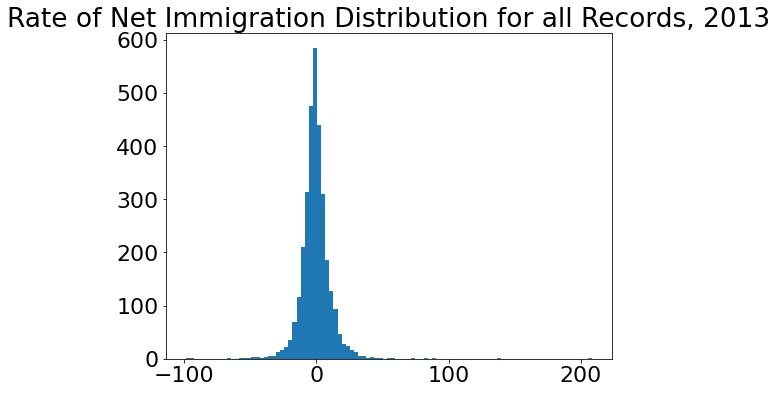

In [5]:
# Net immigration for year 2013
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size':22})
plt.hist(df['R_NET_MIG_2013'],bins=np.linspace(np.nanmin(df['R_NET_MIG_2013']),np.nanmax(df['R_NET_MIG_2013']),num=100))
plt.title('Rate of Net Immigration Distribution for all Records, 2013')

## Understanding mean, median and mode
Here we measure the central tendency of the data

Text(0.5, 1.0, 'Histogram of uniformly distributed RV')

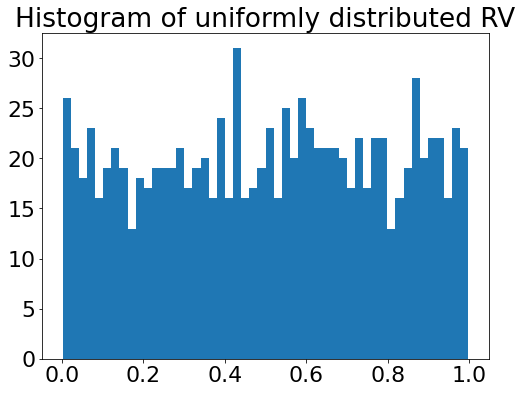

In [6]:
# mean
import random
random.seed(2019)
plt.figure(figsize=(8,6))
rvs = [random.random() for _ in range(1000)]
plt.hist(rvs, bins=50)
plt.title('Histogram of uniformly distributed RV')

In [7]:
# median, is more robust than mean
np.median(rvs)

# for example change the last item of rvs to 1000 and see its effect to mean and median
rvs[-1] = 1000
print('mean: ',np.mean(rvs))
print('median: ', np.median(rvs))

mean:  1.5054701085937803
median:  0.5150437661964872


Text(0.5, 1.0, 'Bimodal')

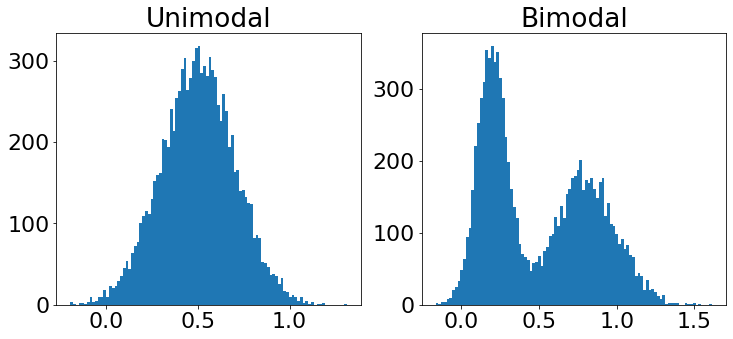

In [8]:
# mode is the most frequent element in the sets 
# the following code snippet demonstrates two distributions: unimodal and bimodal

r1 = [random.normalvariate(0.5,0.2) for _ in range(10000)]
r2 = [random.normalvariate(0.2,0.1) for _ in range(5000)]
r3 = [random.normalvariate(0.8,0.2) for _ in range(5000)]

fig,axes = plt.subplots(1,2,figsize=(12,5))
axes[0].hist(r1,bins=100)
axes[0].set_title('Unimodal')

axes[1].hist(r2+r3, bins=100)
axes[1].set_title('Bimodal')

## Learn about variance, standard deviation, percentiles and skewness

While here we measure the spreading behaviour of data

Text(0.5, 1.0, 'Small variance')

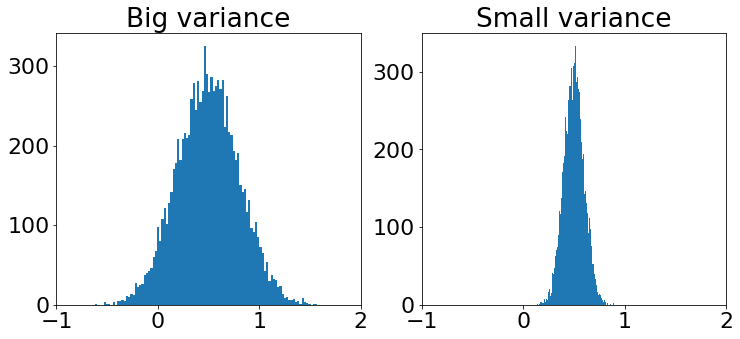

In [9]:
# Variance
# This code snippets generate two normal distributions: same mean, different variance
# Displayed using histogram plot
r1 = [random.normalvariate(0.5,0.3) for _ in range(10000)]
r2 = [random.normalvariate(0.5,0.1) for _ in range(10000)]

fig, axes = plt.subplots(1,2,figsize=(12,5))
axes[0].hist(r1,bins=100)
axes[0].set_xlim([-1,2])
axes[0].set_title('Big variance')
axes[1].hist(r2,bins=100)
axes[1].set_xlim([-1,2])
axes[1].set_title('Small variance')

Text(0.5, 1.0, 'Variable with different variances')

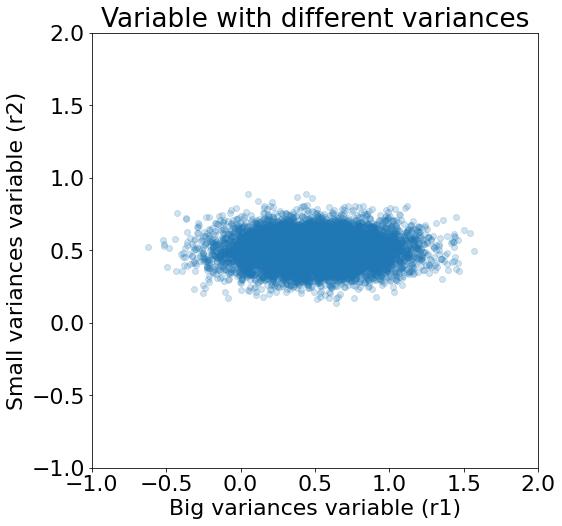

In [10]:
# using the same distributions, now we display the variances
# scatter plot

plt.figure(figsize=(8,8))
plt.scatter(r1,r2,alpha=0.2)
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.xlabel('Big variances variable (r1)')
plt.ylabel('Small variances variable (r2)')
plt.title('Variable with different variances')

Text(0, 0.5, 'Net Immigration Rate')

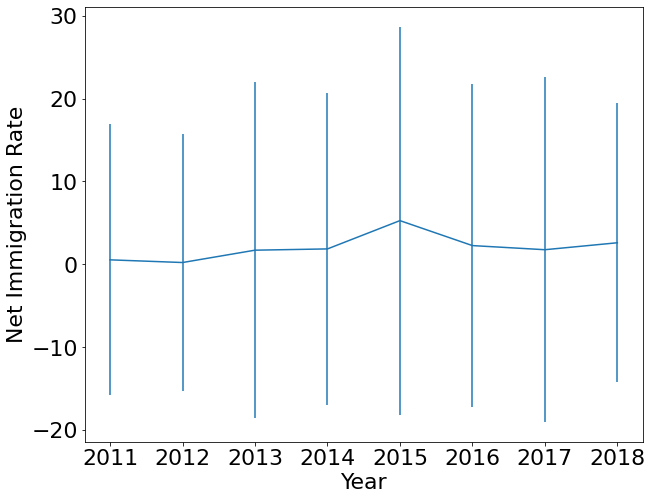

In [11]:
# Standard deviation
# used more commonly to measure the level of dispersion
# since it has the same unit as the population

dfTX = df[df['State']=='TX'].tail(-1)

YEARS = [year for year in range(2011,2019)]
MEANS = []
STDS = []
for i in range(2011, 2019):
  year = 'R_NET_MIG_'+str(i)
  MEANS.append(np.mean(dfTX[year]))
  STDS.append(np.std(dfTX[year]))

plt.figure(figsize=(10,8))
plt.errorbar(YEARS,MEANS,yerr=STDS)
plt.xlabel('Year')
plt.ylabel('Net Immigration Rate')

The quartiles of Texas' 2013 immigration data  [-7.83469971  0.87919226  8.84040759]


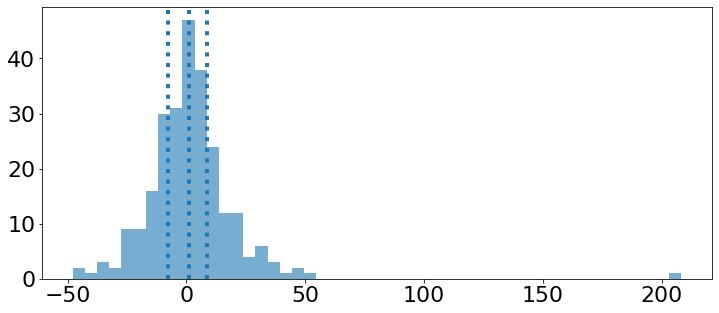

In [12]:
# Quantiles
# Calculate and display quartiles of Texas' 2013 immigration data
# first we show them as array
print('The quartiles of Texas\' 2013 immigration data ',np.quantile(dfTX['R_NET_MIG_2013'],[0.25, 0.5, 0.75]))

# then visualize them in histogram
plt.figure(figsize=(12,5))
plt.hist(dfTX['R_NET_MIG_2013'],bins=50, alpha=0.6)
for quartile in np.quantile(dfTX['R_NET_MIG_2013'],[0.25,0.5,0.75]):
  plt.axvline(quartile,linestyle=':',linewidth=4)

### Skewness
Measures the direction data takes and the extent to which distribution tilts. Based on the following equation:
$$ Sk = \frac{(\hat x - mode)}{σ}$$

If mean > mode, skewness is positive and data skewed to the right. Otherwise to the left

Text(0.5, 1.0, 'Skewed to the left')

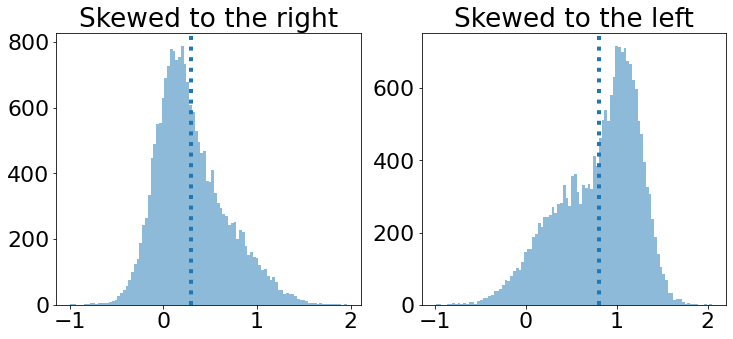

In [13]:
from matplotlib import figure
# Skewness

r1 = [random.normalvariate(0.5, 0.4) for _ in range(10000)]
r2 = [random.normalvariate(0.1, 0.2) for _ in range(10000)]
r3 = [random.normalvariate(1.1, 0.2) for _ in range(10000)]

fig, axes = plt.subplots(1,2,figsize=(12,5))
axes[0].hist(r1+r2, bins=100,alpha=0.5)
axes[0].axvline(np.mean(r1+r2), linestyle=':', linewidth=4)
axes[0].set_title("Skewed to the right")
axes[1].hist(r1+r3, bins=100, alpha=0.5)
axes[1].axvline(np.mean(r1+r3), linestyle=':', linewidth=4)
axes[1].set_title('Skewed to the left')

### Revisit of outlier detection
**z-score** a.k.a **standard score**, is a good measure of distance between an entry and population mean relative to variance

$$ z = \frac {x-\hat x} {\sigma}$$

For normal distribution with unit variance ($\mu$ = 1) 0 < z < 3, has a probability of 0.27%

Text(0.5, 1.0, 'Integer Z values for symmetric distribution')

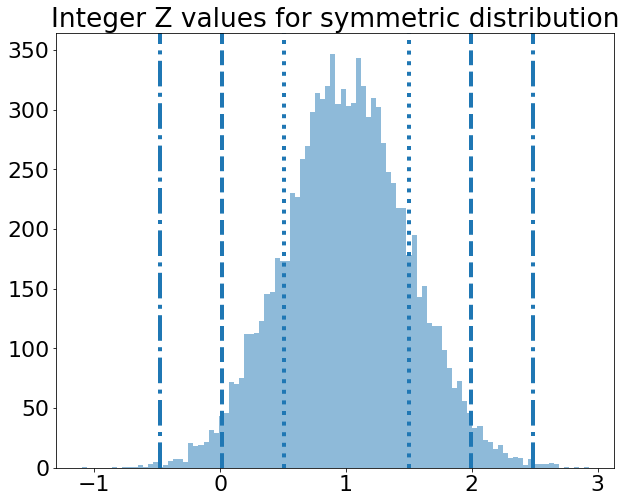

In [14]:
# Example of using z-score on normal distribution

random.seed(2000)
x = [random.normalvariate(1,0.5) for _ in range(10000)]
plt.figure(figsize=(10,8))
plt.hist(x,bins=100,alpha=0.5)
styles = [":","--","-."]
for i in range (3):
  plt.axvline(np.mean(x)+(i+1)*np.std(x),linestyle=styles[i],linewidth=4)
  plt.axvline(np.mean(x)-(i+1)*np.std(x),linestyle=styles[i],linewidth=4)

plt.title("Integer Z values for symmetric distribution")

Text(0.5, 1.0, 'Integer Z values boundaries for asymmetric data')

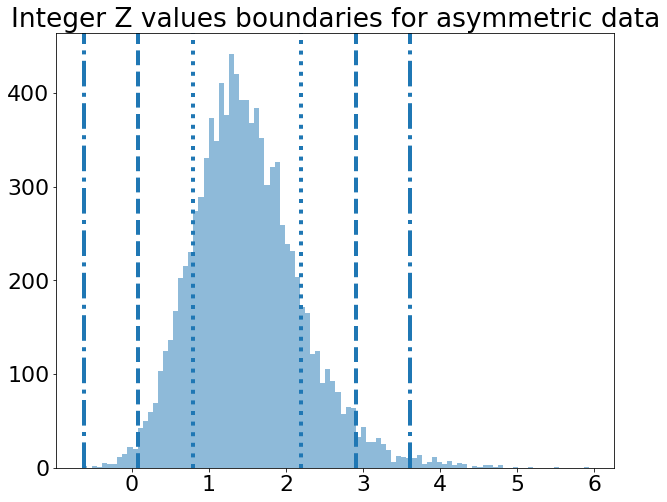

In [15]:
# now change data points by adding expovariate random floating point numbers
# i.e similar to exponentially Poison distribution

random.seed(2000)
x = [random.normalvariate(1,0.5)+random.expovariate(2) for _ in range(10000)]
plt.figure(figsize=(10,8))
plt.hist(x,bins=100,alpha=0.5)
styles = [":","--","-."]
for i in range (3):
  plt.axvline(np.mean(x)+(i+1)*np.std(x),linestyle=styles[i],linewidth=4)
  plt.axvline(np.mean(x)-(i+1)*np.std(x),linestyle=styles[i],linewidth=4)

plt.title("Integer Z values boundaries for asymmetric data")

Hence there are more outliers on the right side and these outliers modify the means and **z-score** as well.

## How to handle categorial variable and mixed data
Here we introduce 2 main descriptive statistics i.e. *frequency* and *proportions*

Text(0.5, 1.0, 'Bar plot of frequency')

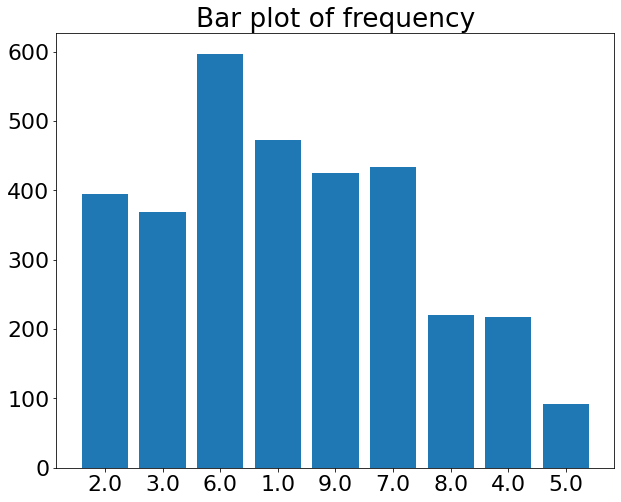

In [16]:
# Calculating frequency and plot them as histogram
from collections import Counter

counter = Counter(df['Rural-urban_Continuum Code_2013'].dropna())
labels = []
x = []
for key, val in counter.items():
    labels.append(str(key))
    x.append(val)
#print(counter[5])
plt.figure(figsize=(10,8))
plt.bar(labels,x)
plt.title('Bar plot of frequency')

Text(0.5, 1.0, 'Pie plot for rural-urban continuum code')

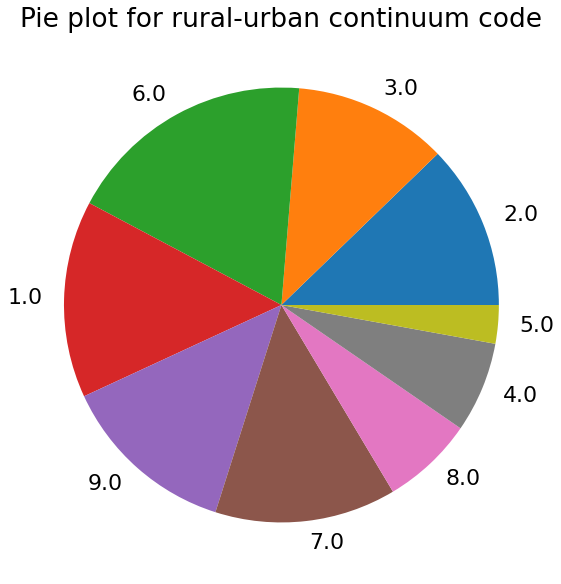

In [17]:
# Calculate proportions and plot them as pie chart
y = np.array(x)/sum(x)

plt.figure(figsize=(10,10))
plt.pie(x=y, labels=labels)
plt.title('Pie plot for rural-urban continuum code')

## Transferring continous variables to a categorial one
Occasionally we need to convert the continous variable to a categorial one (e.g. age-cohort of the population) so the noise introduced by sparsity of some age group (e.g. above 80 years) will be reduced. 

A common way to perform this is to use quantile e.g quartiles or deciles

Text(0.5, 1.0, 'Quantiles for net migration data')

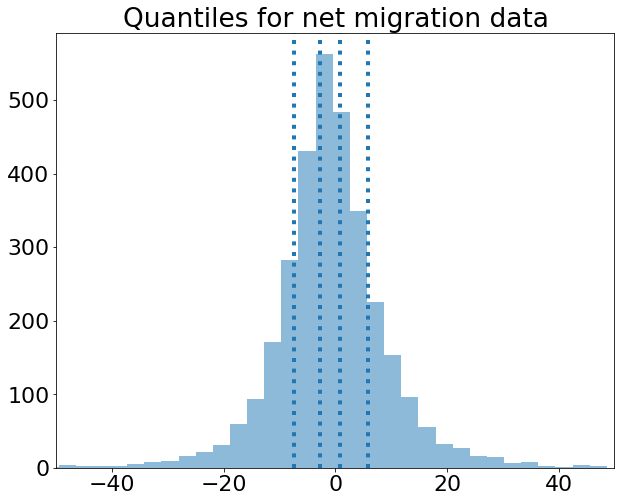

In [18]:
series = df['R_NET_MIG_2013'].dropna()
quantiles = np.quantile(series,[0.2*i for i in range(1,5)])
plt.figure(figsize=(10,8))
plt.hist(series,bins=100,alpha=0.5)
plt.xlim(-50,50)
for i in range(len(quantiles)):
  plt.axvline(quantiles[i],linestyle=':',linewidth=4)
plt.title('Quantiles for net migration data')

## Using bivariate and multivariate descriptive statistics
Bivariate descriptive statistics apply two variables rather than one and this introduce us to *Covariance* and *correlation* (No, they are not the same thing as you think)

**Covariance** indicates the direction of the linear relationship between variables while **correlation** measures both the strength and direction of the linear relationship between two variables. Correlation is a derived from covariance. You can see how below they are related:

$$ cov_{xy} =\sigma_{xy}= \frac{\sum _{i=1}^n (x_{i}-\hat x)(y_{i} - 
\hat y)} {n}$$

$$ corr_{xy} = \rho(x,y) = \frac{\sigma_{xy}}{\sigma_{x}\sigma_{y}}$$

**Note**: covariance **only describe the linear relationship** between two random variables. Therefore, if a covariance between X and Y equal to zero, X and Y may have a non linear relationship

See [this link](https://builtin.com/data-science/covariance-vs-correlation) for explanation on covariance and correlation up to their matrix

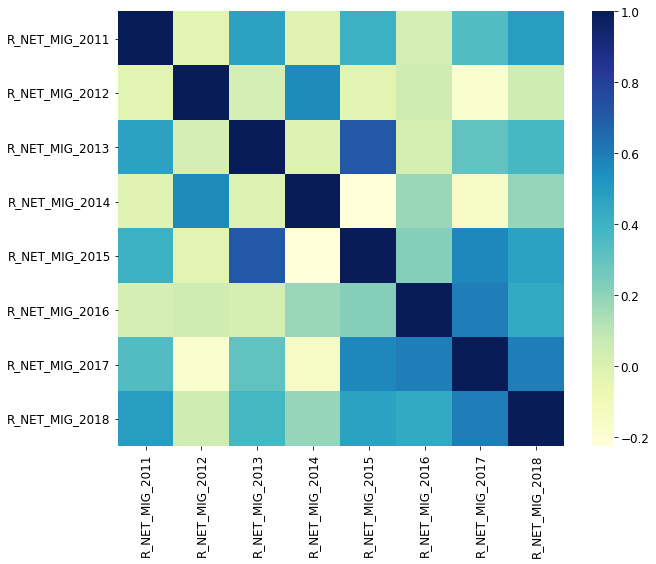

In [23]:
# We use the net immigration rates for county in Texas.
# use correlation to inspect the relationship across the years

corrs = dfTX[['R_NET_MIG_2011','R_NET_MIG_2012','R_NET_MIG_2013','R_NET_MIG_2014','R_NET_MIG_2015',
             'R_NET_MIG_2016','R_NET_MIG_2017','R_NET_MIG_2018']].corr()

# rather than show the result as table, a better way to visualize it by using heatmap
import seaborn as sns
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size':12})
sns.heatmap(corrs,cmap='YlGnBu')

### Cross tabulation
Is the discrete version of correlation detection for categorial variable. The example below demonstrates 

In [26]:
# Golf and weather example
weather = ['rainy','sunny','rainy','windy','windy',
           'sunny','rainy','windy', 'sunny','rainy',
           'sunny','windy','windy']
golfing = ['Yes','Yes','No','No','Yes','Yes','No','No',
           'Yes','No','Yes','No','No']
dfGolf = pd.DataFrame({'weather':weather,'golfing':golfing})
pd.crosstab(dfGolf.weather, dfGolf.golfing, margins=True)
          

golfing,No,Yes,All
weather,,,
rainy,3,1,4
sunny,0,4,4
windy,4,1,5
All,7,6,13
